# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [87]:
#install spacy in the current conda environment
%pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [88]:
!pip install matplotlib

3229.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [89]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



3235.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.3 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [2]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [3]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [4]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [5]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [6]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [7]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [8]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [9]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [10]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

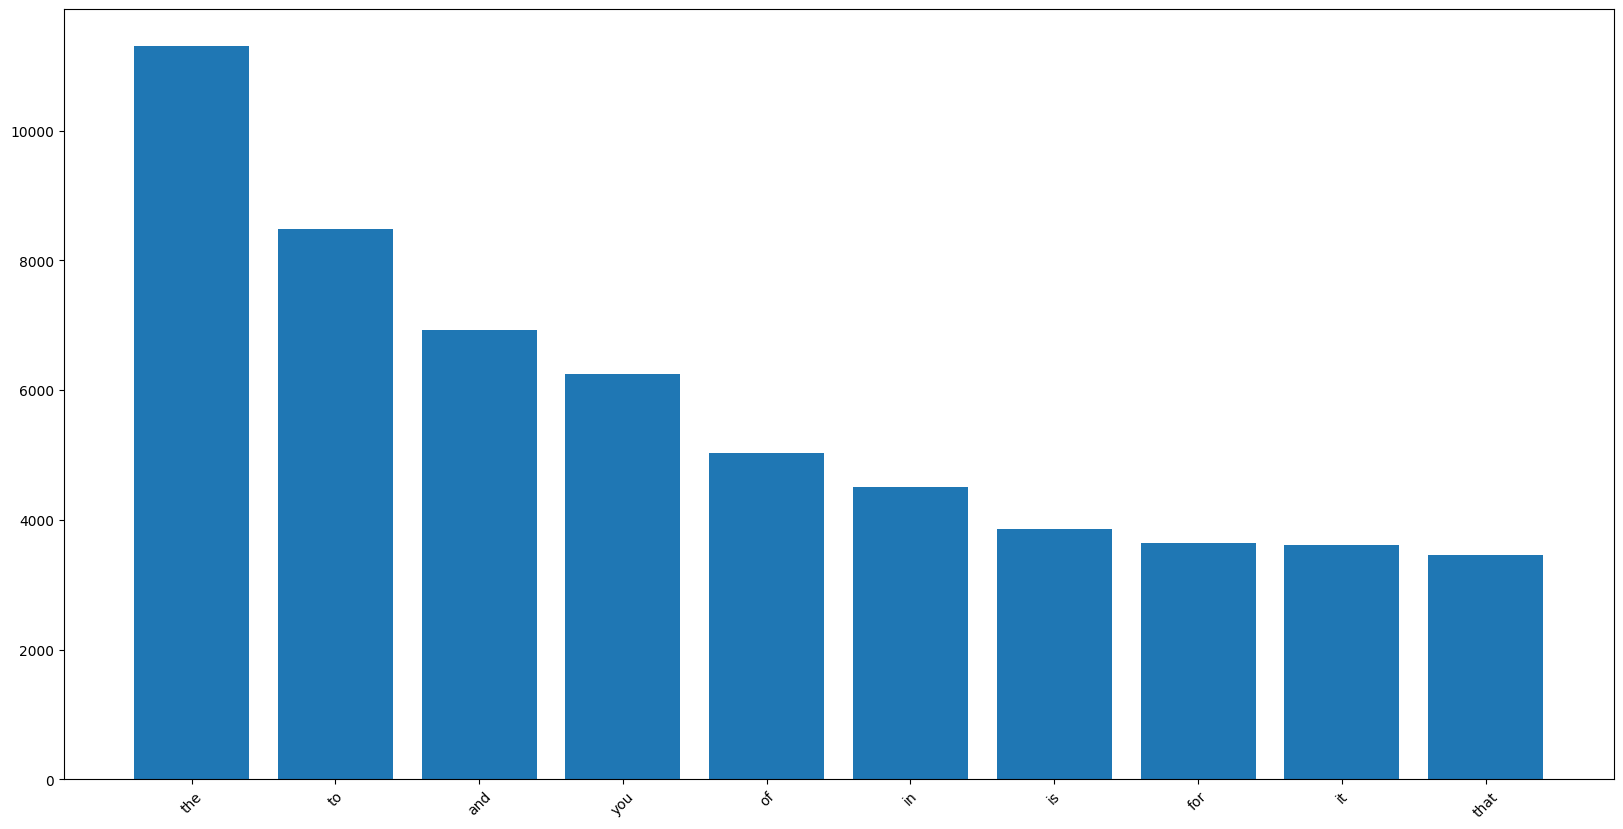

In [12]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: The words in the plot seem to just be filler/stop words. They do not indicate any topics relevant to what we are looking for. These are the same types of words that we typically wnat to avoid accounting for with the bag of words approach.

#### Lemmatization and stopword removal

In [13]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [14]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [15]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [16]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [17]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [18]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()
word_counts

not               0.019741
student           0.008160
like              0.008160
people            0.007753
class             0.006815
                    ...   
sell minnesota    0.000021
cred              0.000021
credential        0.000021
sell oregon       0.000021
pay dollar        0.000021
Length: 8637, dtype: float64

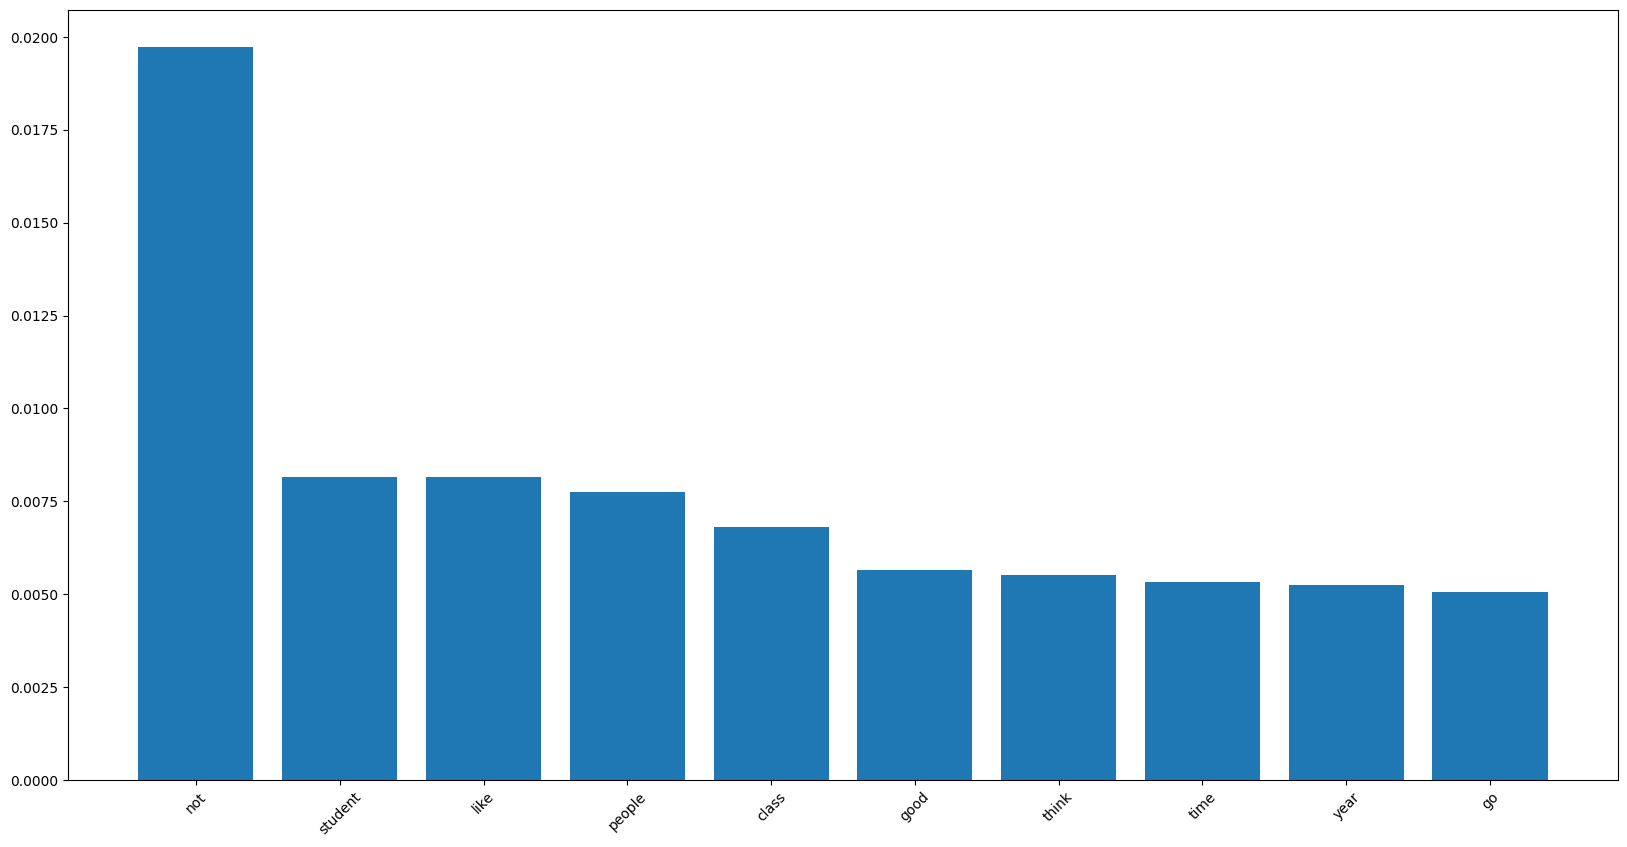

In [19]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [20]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [21]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

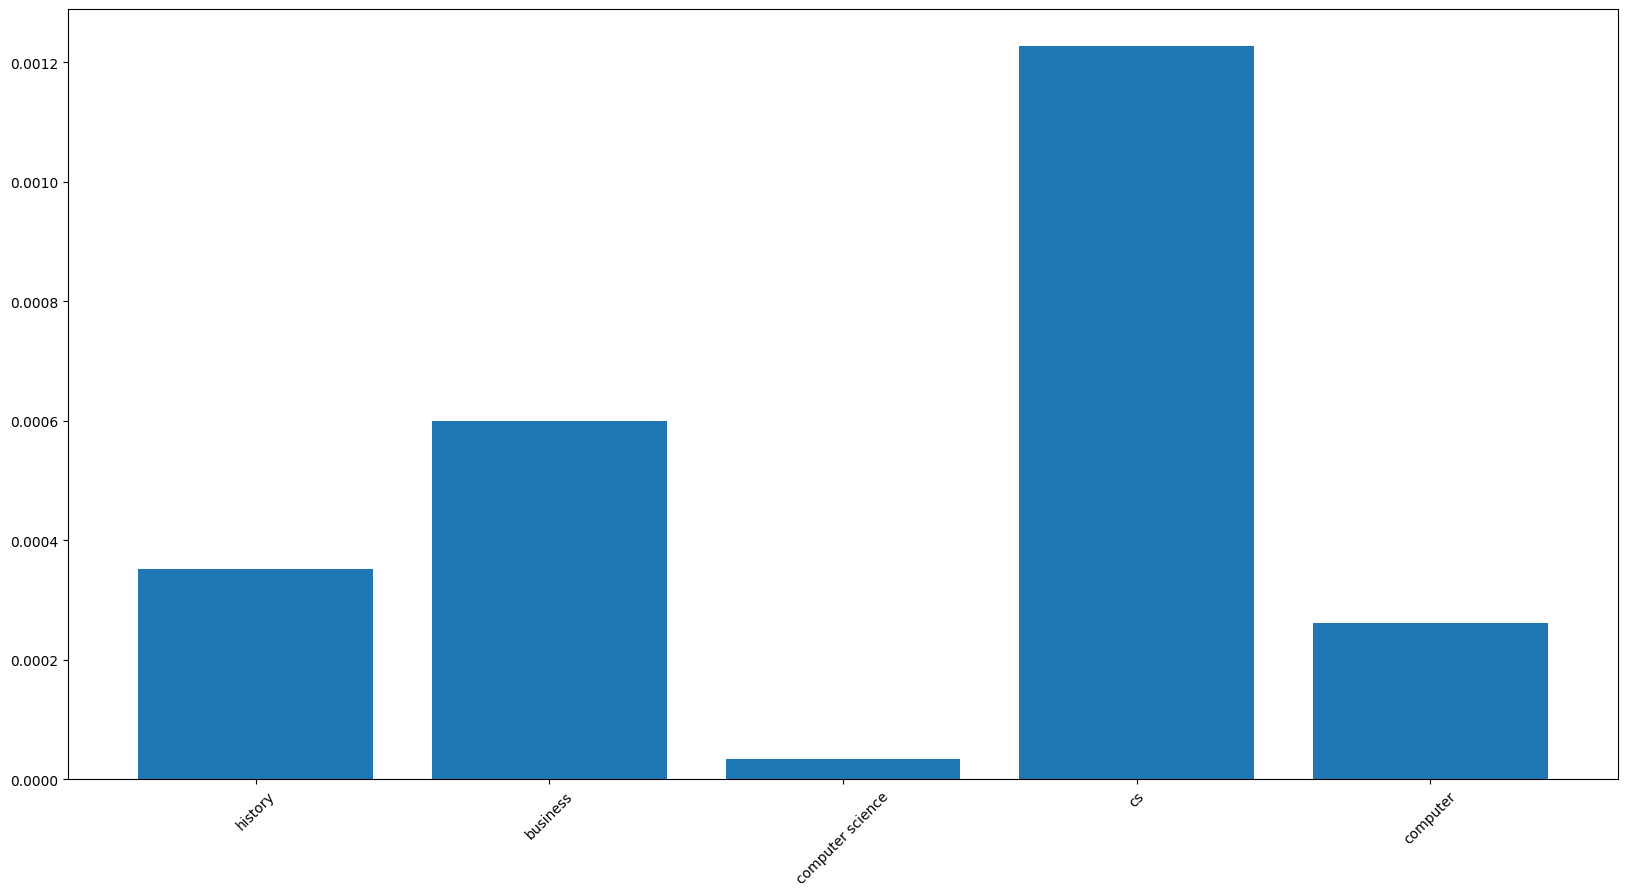

In [22]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [24]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

plot_list2 = word_counts[["information", "technology", "engineering", "math", "english"]]
plot_list2

information    0.000497
technology     0.000034
engineering    0.000945
math           0.002262
english        0.000103
dtype: float64

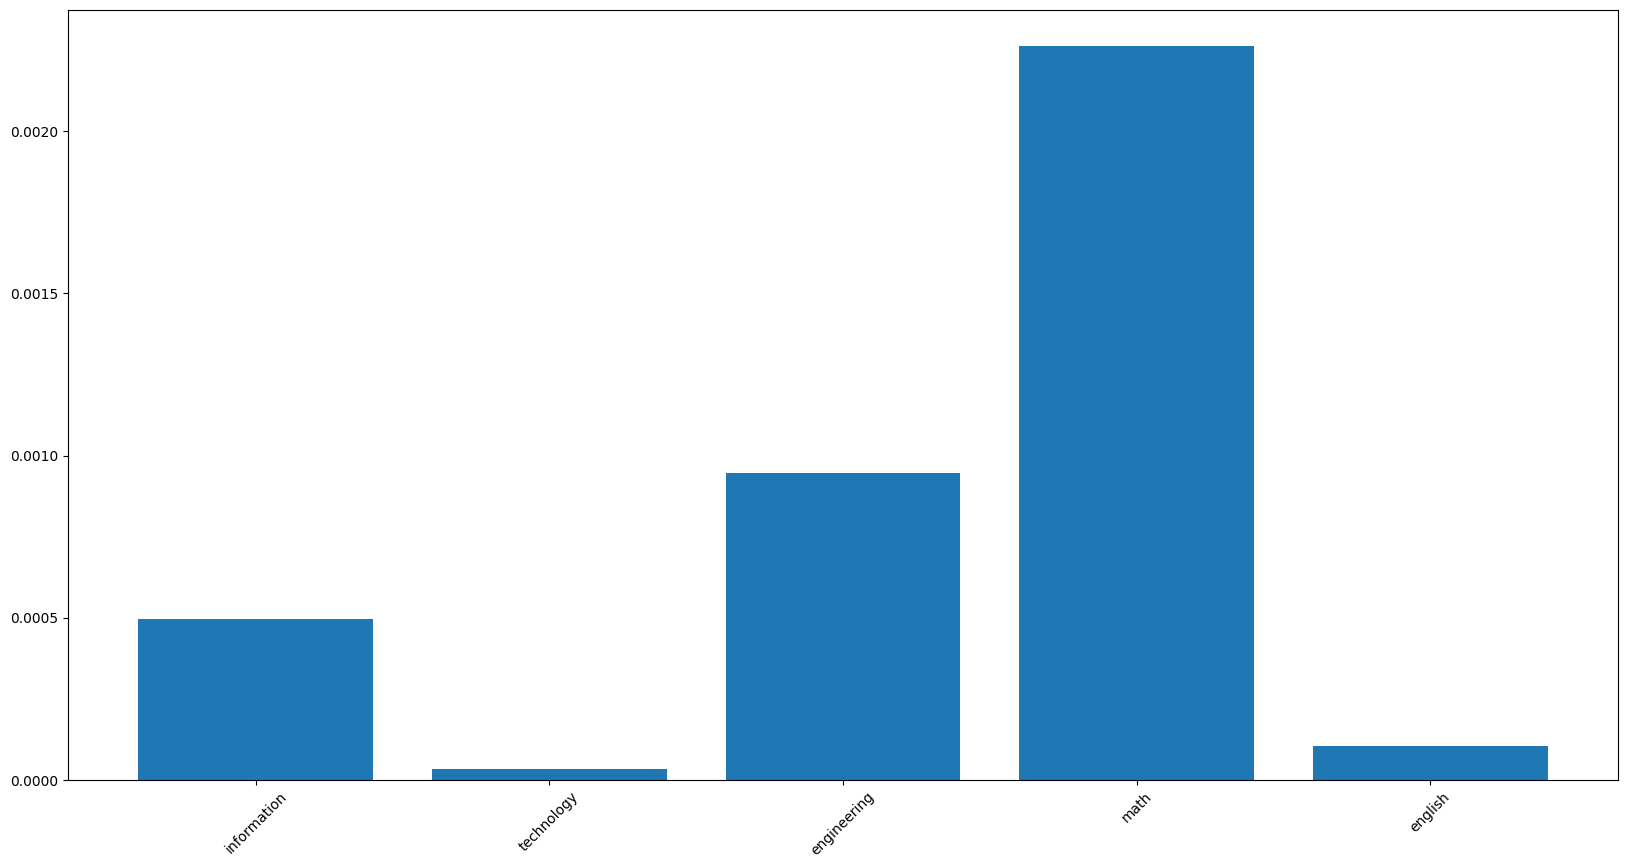

In [25]:
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [26]:
uiuc=pd.read_csv("uiuc.csv")

In [27]:
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [28]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)
uiuc["cleaned_text"][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [29]:
bag_of_words_uiuc = vectorizer.fit_transform(uiuc['cleaned_text'])
bag_of_words_uiuc

<4725x9906 sparse matrix of type '<class 'numpy.int64'>'
	with 130841 stored elements in Compressed Sparse Row format>

In [30]:
bow_df2 = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer.get_feature_names_out())
bow_df2

,ab,able,able to,about,about but,about doing,about getting,about him,about hours,about how,...,youtube,youve,youve already,youve got,youve never,yup,zelle,zero,zone,zone and
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
bow_df2 = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer.get_feature_names_out())
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2

of            1854
in            1794
is            1646
it            1530
for           1488
              ... 
nervous          3
netid            3
never know       3
never met        3
menu             3
Length: 9906, dtype: int64

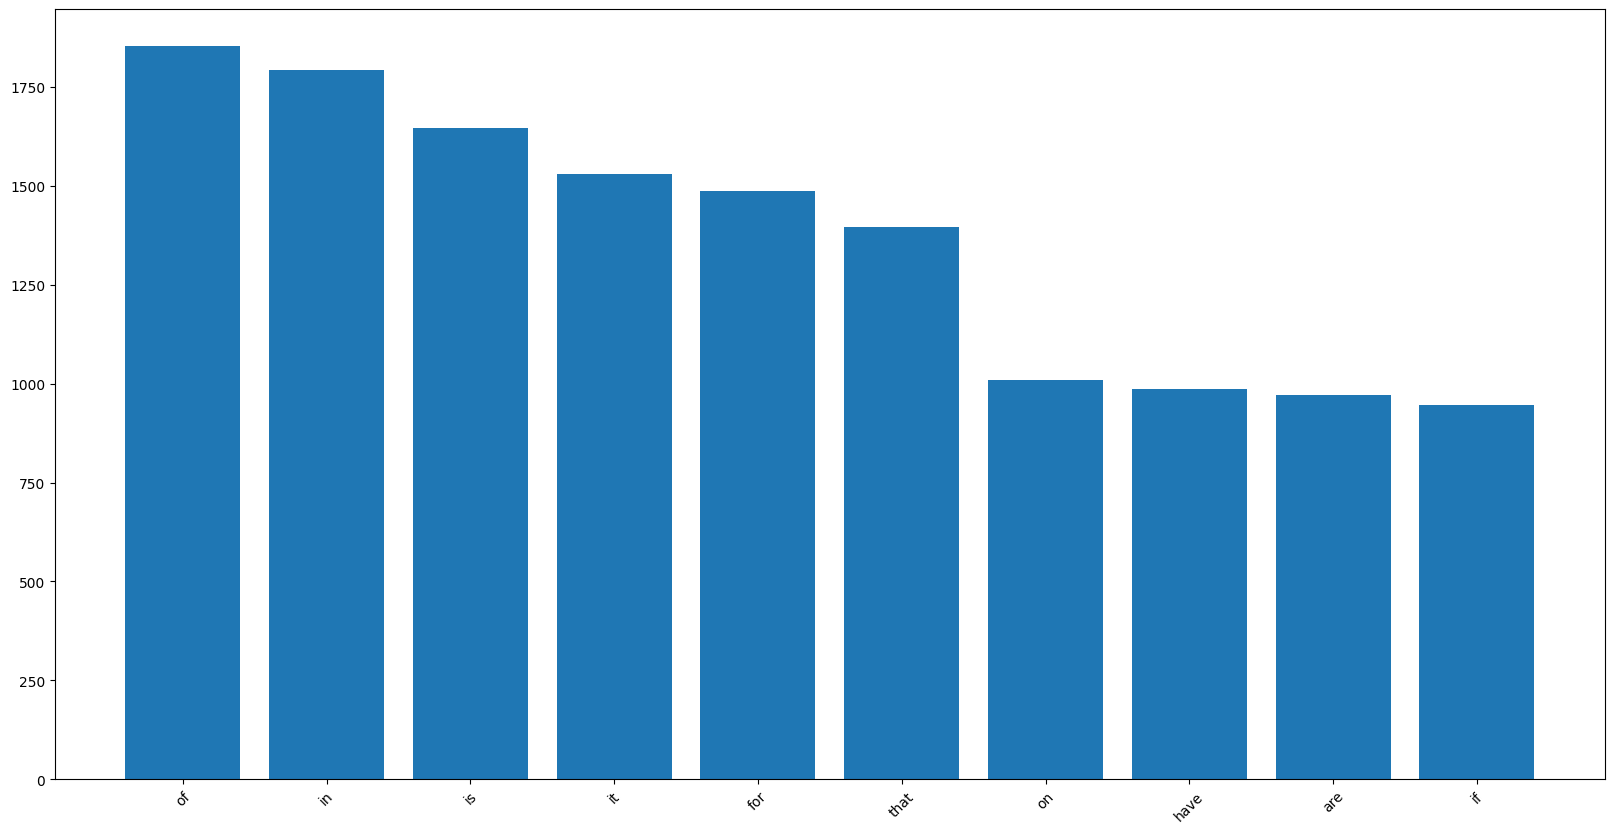

In [32]:
word_counts2 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts2.index, word_counts2.values)
plt.xticks(rotation=45)
plt.show()

In [33]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [34]:
bag_of_words_uiuc = vectorizer.fit_transform(uiuc['lemmatized_text'])
bag_of_words_uiuc

<4725x3891 sparse matrix of type '<class 'numpy.int64'>'
	with 49429 stored elements in Compressed Sparse Row format>

In [35]:
bow_df2 = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer.get_feature_names_out())
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2 = word_counts2 / word_counts2.sum()
word_counts2

not               0.021805
like              0.009663
people            0.008704
good              0.007021
time              0.006804
                    ...   
not personally    0.000054
not person        0.000054
not park          0.000054
not open          0.000054
ab                0.000054
Length: 3891, dtype: float64

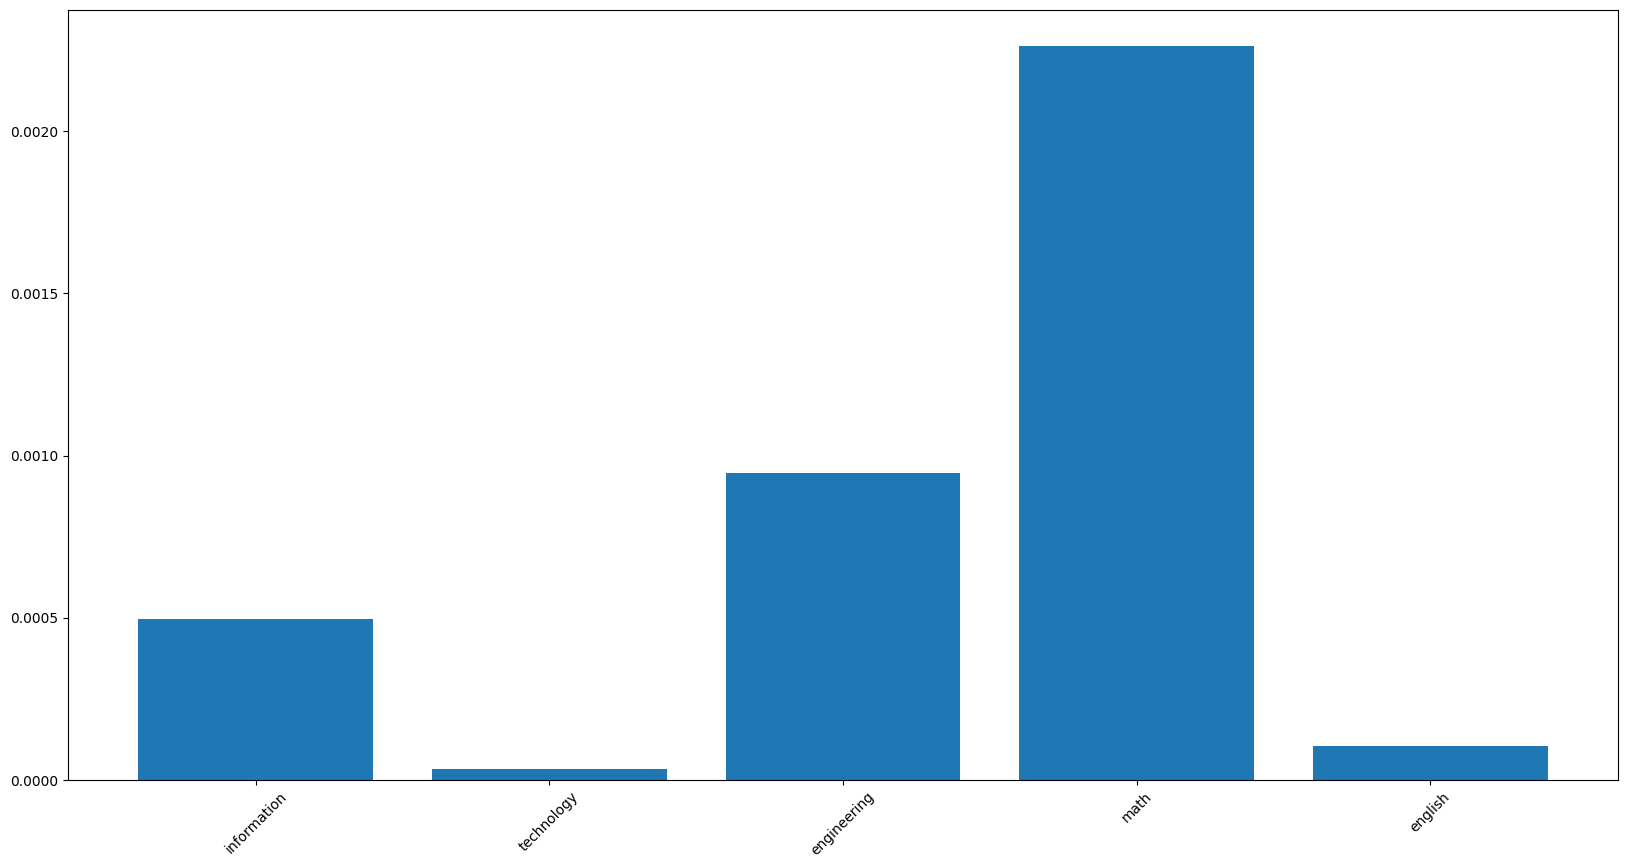

In [36]:
plot_list_uiuc = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

In [37]:
plot_list_uiuc = word_counts2[["history", "business", "computer science", "cs", "computer"]]
plot_list_uiuc

history             0.000344
business            0.000543
computer science    0.000054
cs                  0.001411
computer            0.000290
dtype: float64

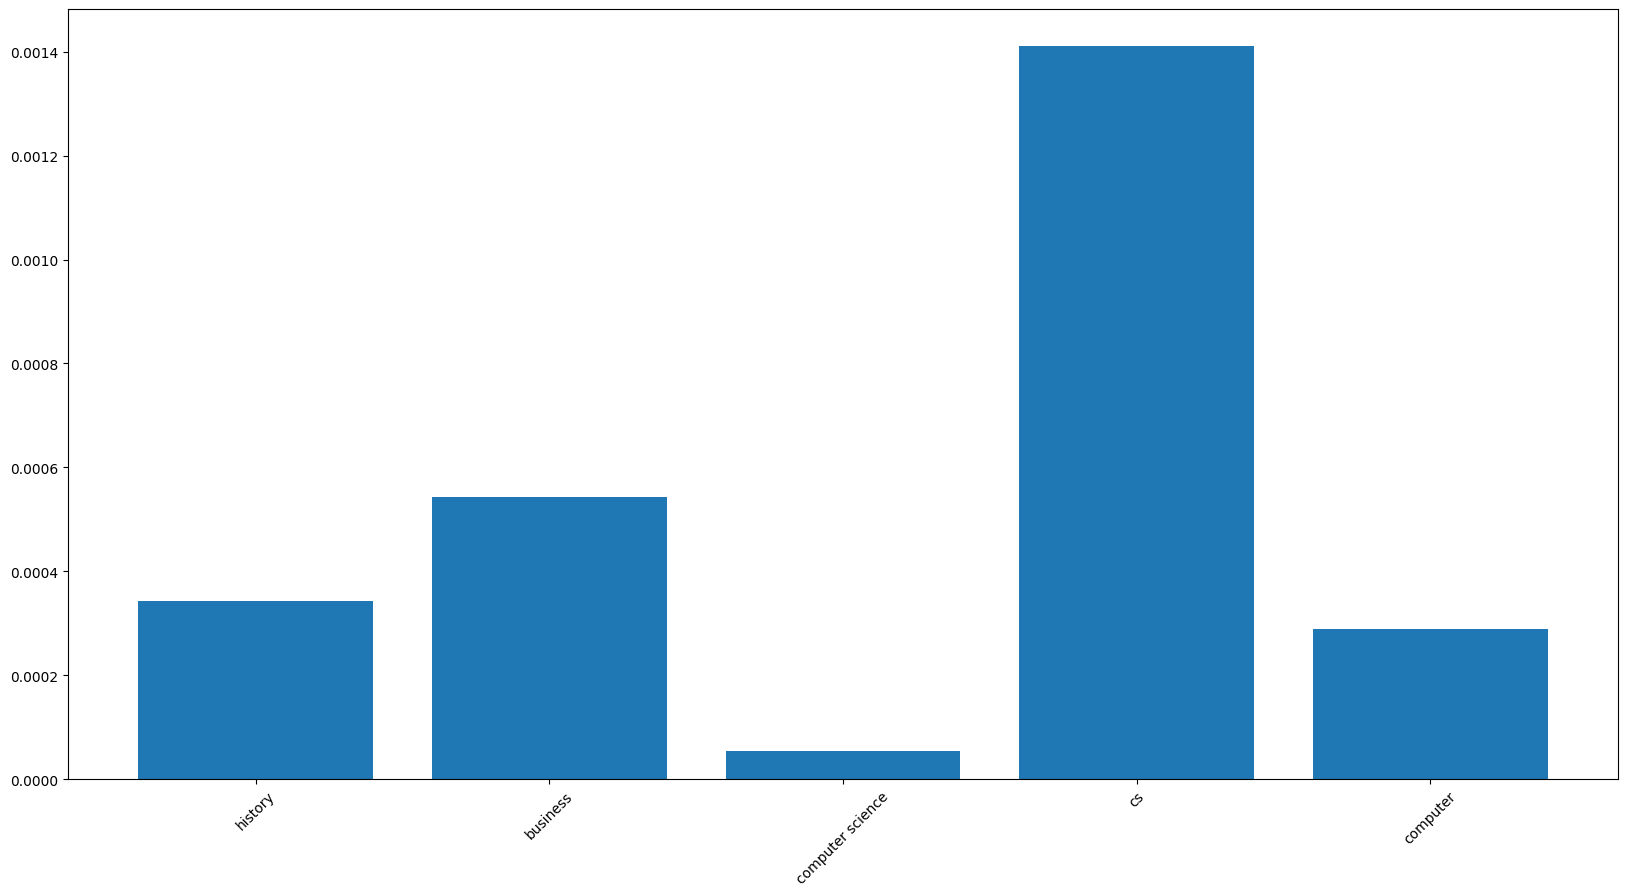

In [38]:
plt.figure(figsize=(20,10))
plt.bar(plot_list_uiuc.index, plot_list_uiuc.values)
plt.xticks(rotation=45)
plt.show()

In [39]:
plot_list_uiuc2 = word_counts2[["information", "technology", "engineering", "math", "english"]]
plot_list_uiuc2

information    0.000489
technology     0.000072
engineering    0.000706
math           0.000543
english        0.000163
dtype: float64

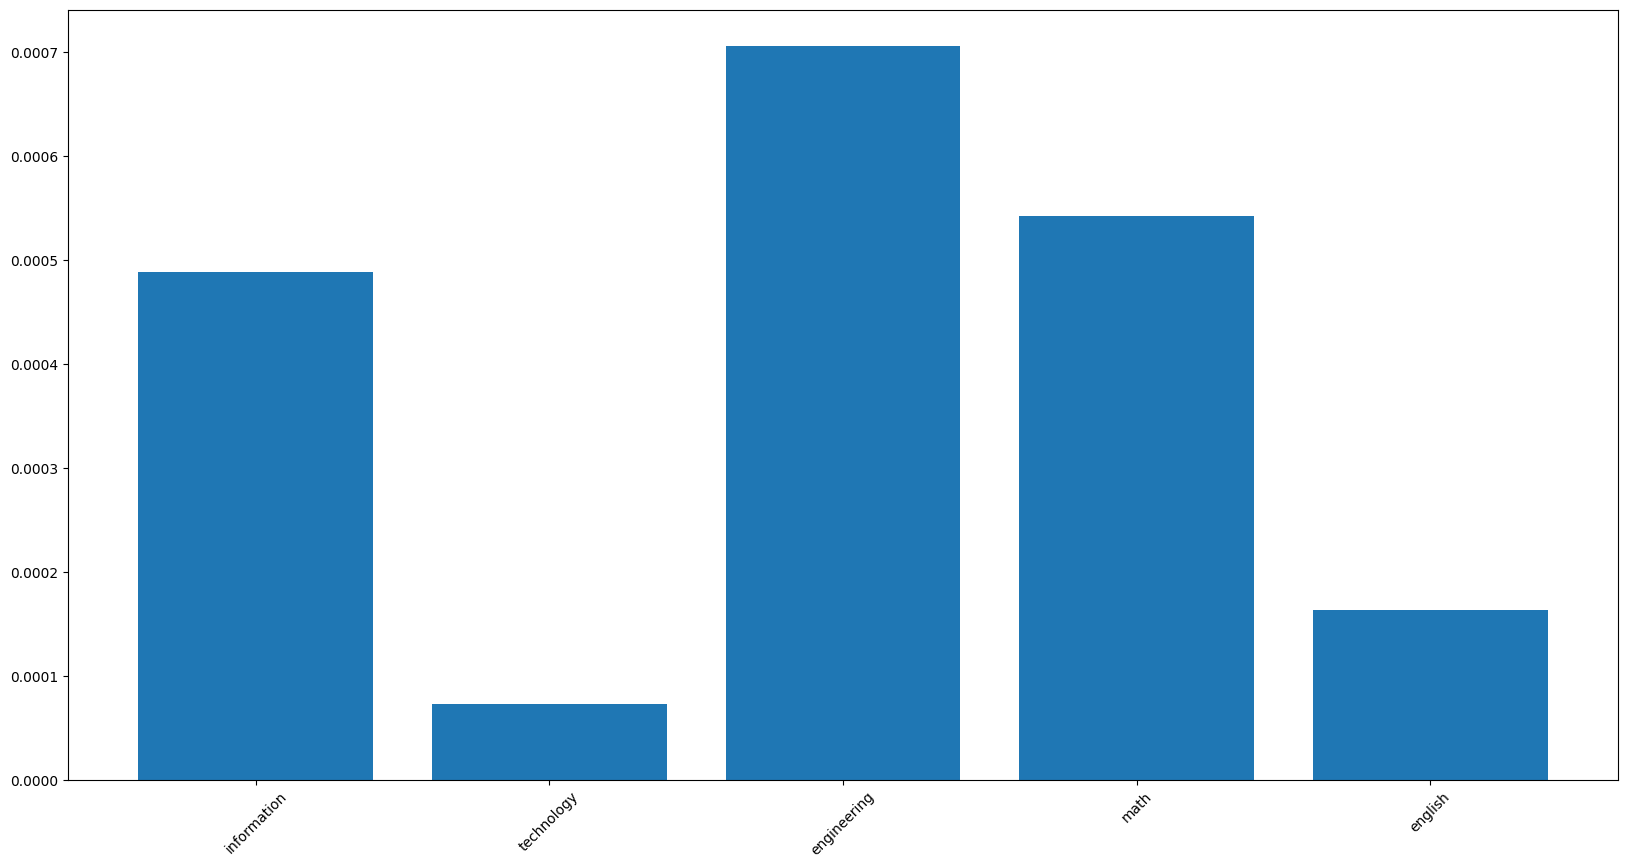

In [40]:
plt.figure(figsize=(20,10))
plt.bar(plot_list_uiuc2.index, plot_list_uiuc2.values)
plt.xticks(rotation=45)
plt.show()

Problem 2 Discussion: An interesting difference between the relative frequencies of the five words between the two subreddits is that "math" was Michigan's highest relative requency word and "engineering" was uiuc's. In both subreddits, "technology" had the lowest relative frequency.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [41]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [47]:
#clean and lemmatize the data csv

data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['text'].apply(clean).apply(lemmatize)
data.head()

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text,lemmatized_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...,professor lecture go to learn stuff ourself re...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...,find helpful lecture slide embed mistake make ...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...,try email university housing request access
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...,purchase illini cash add nonresident meal plan...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...,thank suggestion not occur


In [48]:
#create a bag of words representation with count vectorizer

bag_of_words_data = vectorizer.fit_transform(data['lemmatized_text'])
bag_of_words_data

<9450x8315 sparse matrix of type '<class 'numpy.int64'>'
	with 123420 stored elements in Compressed Sparse Row format>

In [49]:
bow_df_data = pd.DataFrame(bag_of_words_data.toarray(), columns=vectorizer.get_feature_names_out())
bow_df_data

,aa,aapd,ab,abhorrent,ability,able,able attend,able find,able help,able park,...,yup,zelle,zero,zhang,zionism,zionist,zip,zip car,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#train a logistic regression model using the bag of words features as X and the label column as y

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bow_df_data
y = data["label"]

In [53]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [54]:

y_pred = model.predict(X)

In [55]:
#report the accuracy of the model

accuracy_score(y, y_pred)

0.9027513227513227

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.7174603174603175

In [ ]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed?

Part 2 Answer: This model had an accuracy score of 71.75% which is significantly lower than the first model (90.28%). I think this is because the first model used training data that was also a part of the test data. This makes the model more likely to be accurate compared to the second model, which did not train itself on a portion of the test data.

#### Part 3: Examine the top features of your model using the following code

In [ ]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [66]:
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
scoefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [67]:
top_10_negative

,feature,coefficient
8305,yup,-0.103793
8306,zelle,0.505332
8307,zero,-0.081202
8308,zhang,-0.219065
8309,zionism,-0.985102
8310,zionist,-1.818497
8311,zip,-0.934541
8312,zip car,-0.537142
8313,zone,0.677140
8314,zoom,-0.405625


In [68]:
top_10_positive

,feature,coefficient
0,aa,-1.236935
1,aapd,-0.158363
2,ab,0.298438
3,abhorrent,-0.331742
4,ability,-0.863389
5,able,-0.502558
6,able attend,-0.250678
7,able find,-0.023353
8,able help,0.206397
9,able park,-0.259199


In [ ]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [69]:
!pip install gensim

In [71]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

# convert bow X into a gensim corpus
corpus = Sparse2Corpus(bag_of_words_uiuc, documents_columns=False)

# create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [75]:
# train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

# show the topics
lda_model.print_topics()

[(0,
  '0.019*"instructor" + 0.014*"downtown champaign" + 0.009*"econ" + 0.009*"dirty" + 0.008*"fade" + 0.008*"functionality" + 0.007*"conduct" + 0.006*"lean" + 0.006*"ask people" + 0.006*"club good"'),
 (1,
  '0.019*"constantly" + 0.013*"lead" + 0.013*"burn" + 0.010*"dirty" + 0.009*"freshman class" + 0.009*"create" + 0.008*"cash" + 0.008*"club good" + 0.007*"cent" + 0.007*"like know"'),
 (2,
  '0.017*"destination" + 0.012*"greek" + 0.009*"campus week" + 0.008*"employ" + 0.007*"issue not" + 0.007*"entitle" + 0.007*"easy find" + 0.006*"criterion" + 0.006*"enrol" + 0.006*"lawsuit"'),
 (3,
  '0.046*"fade" + 0.016*"internationally" + 0.012*"downtown champaign" + 0.009*"freshman class" + 0.009*"barrier" + 0.009*"eec" + 0.009*"application receive" + 0.008*"content" + 0.007*"dirty" + 0.007*"conduct"'),
 (4,
  '0.022*"fade" + 0.011*"like know" + 0.010*"ampm" + 0.008*"freshman class" + 0.008*"illness" + 0.007*"dirty" + 0.007*"internationally" + 0.007*"content" + 0.006*"cover" + 0.006*"council"'

1. course information
2. night life
3. student involvement
4. admitted freshman
5. attendence
6. career fair
7. living space
8. health
9. covid
10. class environment

In [76]:
models = lda_model.get_document_topics(corpus, minimum_probability=0)

In [77]:
rows = []
for i in range(len(models)):
    row = [0]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df = pd.DataFrame(rows)

In [78]:
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10
789,0,0.004548,0.004547,0.959071,0.004548,0.004548,0.004548,0.004548,0.004548,0.004548,0.004548
1176,0,0.007145,0.007145,0.935692,0.007147,0.007145,0.007146,0.007145,0.007146,0.007145,0.007145
1792,0,0.007696,0.007695,0.930739,0.007696,0.007696,0.007696,0.007696,0.007695,0.007695,0.007696
1433,0,0.008339,0.008338,0.924965,0.008337,0.008336,0.008338,0.008336,0.008337,0.008339,0.008337
1128,0,0.010008,0.010004,0.909959,0.010003,0.010004,0.010005,0.010006,0.010005,0.010005,0.010002
...,...,...,...,...,...,...,...,...,...,...,...
555,0,0.000821,0.000821,0.000821,0.000821,0.000821,0.000821,0.000821,0.000821,0.000821,0.992611
243,0,0.057763,0.000677,0.000677,0.000677,0.068590,0.163928,0.008981,0.305020,0.031709,0.361977
1366,0,0.131531,0.000634,0.000634,0.433770,0.000634,0.132031,0.004693,0.294806,0.000634,0.000634
899,0,0.000583,0.000583,0.000583,0.128804,0.000583,0.578507,0.120342,0.168848,0.000583,0.000583


In [81]:
pd.set_option('display.max_colwidth', None)
uiuc[(uiuc['Unnamed: 0'] == 2310) | (uiuc['Unnamed: 0'] == 555) | (uiuc['Unnamed: 0'] == 243)] ['text']

243     Tailgate. It's college football. Students tend not to tailgate because its expensive as a student if your parents aren't paying, but as adults with adult income, all of you chipping in some money to tailgate shouldn't be much of an issue. In reality, it probably costs a similar amount of money to send bars vs tailgate, but students are much happier spending that money purely on booze than on a tailgating setup lol. \n\nParking is $25 day of (might be $20 if you prepay, but I've never done it so idk how it works). If you have multiple cars, I recommend finding a random university lot with meters a ways away from the stadium and parking any additional cars there (most metered university lots are free on weekends) and taking a bus back to the stadium for free. That way you only pay for the one car and can just pay $5 per guy for parking. \n\nAs far as places to go, Green Street is great for students, but options are more limited for adults (most adults don't want to go to a club-e

In [82]:
pd.set_option('display.max_colwidth', None)
uiuc[(uiuc['Unnamed: 0'] == 372) | (uiuc['Unnamed: 0'] == 899)] ['text']

372                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

My topic labels were very broad, so the two comments I printed out fit into the topics. The first comment was about the tailgating scene at UIUC, and although some of my labels were about student and campus life, I did not have a single topic label about tailgating. The second comment talked about specific programs' admissions. None of the labels I listed were about admissions, although many related to academia. 